# Nonlinear Regression Function

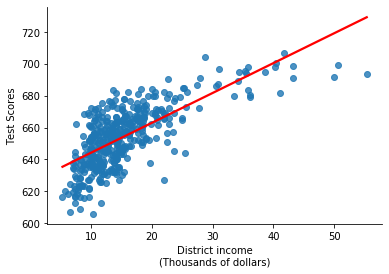

In [1]:
# Figure 2
# importing the necessary libraries
import pandas as pd
from statsmodels.formula.api import ols
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# importing our data and plotting our linear line
data = pd.read_csv('caschool.csv')
sns.regplot(x='avginc', y='testscr', data = data, ci=False, line_kws = {'color':'red'})

# We put titles on both coordinates
plt.xlabel('District income\n(Thousands of dollars)')
plt.ylabel('Test Scores')
sns.despine()

plt.show()

In [2]:
# NOTE: This is an important note. Normally we could do linear regression with our previous chapter's easy method by putting
# ^2 right after the variable's name but we can only do it for the type of data that has only integer values. I have tried
# multiple variables and it hasn't worked but it worked with computer variable which has integer values.

In [3]:
# Because income variable is not an integer, we have to create a column to do regression
data['incomeSquared'] = data['avginc']**2
data

,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr,incomeSquared
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000,514.836124
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024,96.510983
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024,80.604478
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000,80.604478
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671330,9.080333,13.857677,641.799988,639.900024,82.452443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,416,68957,San Mateo,Las Lomitas Elementary,KK-08,984,59.730000,0.101600,3.556900,195,704.300049,0.198171,7290.338867,16.474134,28.716999,5.995935,700.900024,707.700012,824.666034
416,417,69518,Santa Clara,Los Altos Elementary,KK-08,3724,208.479996,1.074100,1.503800,721,706.750000,0.193609,5741.462891,17.862625,41.734108,4.726101,704.000000,709.500000,1741.735768
417,418,72611,Ventura,Somis Union Elementary,KK-08,441,20.150000,3.563500,37.193802,45,645.000000,0.102041,4402.831543,21.885857,23.733000,24.263039,648.299988,641.700012,563.255280
418,419,72744,Yuba,Plumas Elementary,KK-08,101,5.000000,11.881200,59.405899,14,672.200012,0.138614,4776.336426,20.200001,9.952000,2.970297,667.900024,676.500000,99.042297


In [4]:
reg = ols("testscr ~ avginc + incomeSquared", data=data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     261.3
Date:                Fri, 14 Aug 2020   Prob (F-statistic):           2.78e-74
Time:                        10:00:21   Log-Likelihood:                -1662.7
No. Observations:                 420   AIC:                             3331.
Df Residuals:                     417   BIC:                             3344.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       607.3017      3.046    199.362      0.000     601.314     613.290
avginc            3.8510      0.304     12.657      0.000       3.253       4.449
incomeSquared    -0.0423      0.006     -6.758      0.000      -0.055      -0.030
==============================================================================
Omnibus:                        0.556   Durbin-Watson:                   0.951
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.378
Skew:                          -0.048   Prob(JB):                        0.828
Kurtosis:                       3.111   Cond. No.                     2.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Nonlinear regression plotting

Text(0, 0.5, 'Test Scores')

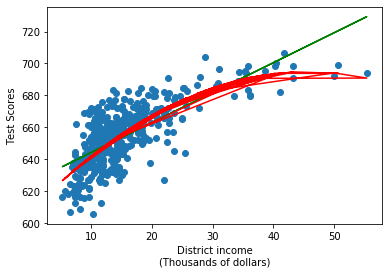

In [5]:
# importing the libraries
import numpy as np
from scipy.interpolate import *
from numpy import *

# putting our data into numpy arrays
x = np.array(data['avginc'])
y = np.array(data['testscr'])

# plotting our data points as 'o'
plt.plot(x,y,'o')
# The green line does what we have done previously (linear line)
plt.plot(x, np.polyval(np.polyfit(x,y,1),x), 'g')
# Red line on the other hand does quadratic equation
plt.plot(x, np.polyval(np.polyfit(x,y,2),x), 'r')
# putting labels into our data
plt.xlabel('District income\n(Thousands of dollars)')
plt.ylabel('Test Scores')


Text(0, 0.5, 'Test Scores')

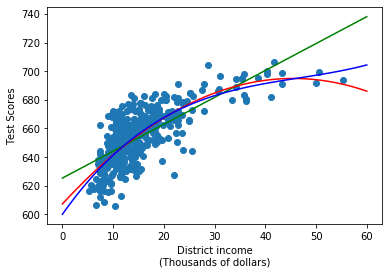

In [6]:
# We are going to more properly draw our functions now:

# This is going to plot our data
plt.plot(x,y,'o')
# This is going to deal with chart's x axis
xp = np.linspace(0,60,100)
# This is going to plot a linear regression function (will be green)
plt.plot(xp, np.polyval(np.polyfit(x,y,1),xp), 'g')
# This is going to plot quadratic regression function (will be blue)
plt.plot(xp, np.polyval(np.polyfit(x,y,2),xp), 'r')
# This is going to plot cubic regression function (will be red)
plt.plot(xp, np.polyval(np.polyfit(x,y,3),xp), 'b')
plt.xlabel('District income\n(Thousands of dollars)')
plt.ylabel('Test Scores')


In [7]:
# Now I am creating the cubic of average income column
data['incomeCube'] = data['avginc']**3
data

,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,testscr,comp_stu,expn_stu,str,avginc,el_pct,read_scr,math_scr,incomeSquared,incomeCube
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000,514.836124,11681.631928
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024,96.510983,948.123932
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024,80.604478,723.666982
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000,80.604478,723.666982
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671330,9.080333,13.857677,641.799988,639.900024,82.452443,748.695619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,416,68957,San Mateo,Las Lomitas Elementary,KK-08,984,59.730000,0.101600,3.556900,195,704.300049,0.198171,7290.338867,16.474134,28.716999,5.995935,700.900024,707.700012,824.666034,23681.933728
416,417,69518,Santa Clara,Los Altos Elementary,KK-08,3724,208.479996,1.074100,1.503800,721,706.750000,0.193609,5741.462891,17.862625,41.734108,4.726101,704.000000,709.500000,1741.735768,72689.788599
417,418,72611,Ventura,Somis Union Elementary,KK-08,441,20.150000,3.563500,37.193802,45,645.000000,0.102041,4402.831543,21.885857,23.733000,24.263039,648.299988,641.700012,563.255280,13367.737436
418,419,72744,Yuba,Plumas Elementary,KK-08,101,5.000000,11.881200,59.405899,14,672.200012,0.138614,4776.336426,20.200001,9.952000,2.970297,667.900024,676.500000,99.042297,985.668910


In [8]:
reg = ols("testscr ~ avginc + incomeSquared + incomeCube", data=data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     175.4
Date:                Fri, 14 Aug 2020   Prob (F-statistic):           1.78e-73
Time:                        10:00:21   Log-Likelihood:                -1661.6
No. Observations:                 420   AIC:                             3331.
Df Residuals:                     416   BIC:                             3347.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       600.0790      5.830    102.937      0.000     588.620     611.538
avginc            5.0187      0.859      5.839      0.000       3.329       6.708
incomeSquared    -0.0958      0.037     -2.564      0.011      -0.169      -0.022
incomeCube        0.0007      0.000      1.452      0.147      -0.000       0.002
==============================================================================
Omnibus:                        0.567   Durbin-Watson:                   0.981
Prob(Omnibus):                  0.753   Jarque-Bera (JB):                0.385
Skew:                          -0.047   Prob(JB):                        0.825
Kurtosis:                       3.115   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
reg = ols("testscr ~ np.log(avginc)", data = data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     537.4
Date:                Fri, 14 Aug 2020   Prob (F-statistic):           4.77e-77
Time:                        10:00:21   Log-Likelihood:                -1659.7
No. Observations:                 420   AIC:                             3323.
Df Residuals:                     418   BIC:                             3331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        557.8323      4.200    132.806      0.000     549.576     566.089
np.log(avginc)    36.4197      1.571     23.183      0.000      33.332      39.508
==============================================================================
Omnibus:                        0.548   Durbin-Watson:                   0.991
Prob(Omnibus):                  0.760   Jarque-Bera (JB):                0.388
Skew:                          -0.059   Prob(JB):                        0.824
Kurtosis:                       3.091   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Test Scores')

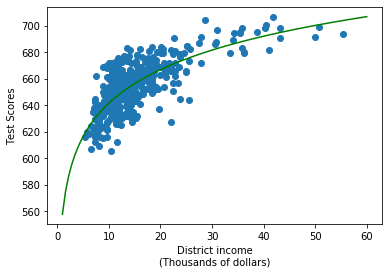

In [10]:
# This is for linear log function
x = np.array(data['avginc'])
y = np.array(data['testscr'])
xp = np.linspace(1,60,100)

plt.plot(x,y,'o')
plt.plot(xp, np.polyval(np.polyfit(np.log(x),y,1),log(xp)), 'g')
plt.xlabel('District income\n(Thousands of dollars)')
plt.ylabel('Test Scores')


In [11]:
# This is supposed to be the data that has been used in the regression (8.20)
dataCPS = pd.read_csv('CPS2015.csv')
dataCPS

,year,ahe,bachelor,female,age
0,2015,11.778846,0,0,26
1,2015,9.615385,0,1,33
2,2015,12.019231,0,0,31
3,2015,18.376068,0,0,32
4,2015,41.836735,0,0,28
...,...,...,...,...,...
7093,2015,96.153847,1,0,25
7094,2015,30.769230,1,0,34
7095,2015,9.230769,0,0,27
7096,2015,13.653846,1,1,27


In [12]:
# Sadly the data that the book has and the data that I downloaded from MyEconLab,
# doesn't match perfectly but to demonstrate I did a regression anyway.
reg = ols("np.log(ahe) ~ age", data = dataCPS).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(ahe)   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     130.6
Date:                Fri, 14 Aug 2020   Prob (F-statistic):           5.56e-30
Time:                        10:00:22   Log-Likelihood:                -5586.5
No. Observations:                7098   AIC:                         1.118e+04
Df Residuals:                    7096   BIC:                         1.119e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1700      0.065     33.226      0.000       2.042       2.298
age            0.0251      0.002     11.428      0.000       0.021       0.029
==============================================================================
Omnibus:                       15.057   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.726
Skew:                          -0.066   Prob(JB):                     0.000233
Kurtosis:                       3.198   Cond. No.                         308.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
reg = ols("np.log(testscr) ~ np.log(avginc)", data = data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(testscr)   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     527.2
Date:                Fri, 14 Aug 2020   Prob (F-statistic):           4.52e-76
Time:                        10:00:22   Log-Likelihood:                 1061.2
No. Observations:                 420   AIC:                            -2118.
Df Residuals:                     418   BIC:                            -2110.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.3363      0.006    981.902      0.000       6.324       6.349
np.log(avginc)     0.0554      0.002     22.962      0.000       0.051       0.060
==============================================================================
Omnibus:                        1.085   Durbin-Watson:                   0.972
Prob(Omnibus):                  0.581   Jarque-Bera (JB):                0.886
Skew:                          -0.096   Prob(JB):                        0.642
Kurtosis:                       3.118   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
reg = ols("np.log(testscr) ~ avginc", data = data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(testscr)   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     415.0
Date:                Fri, 14 Aug 2020   Prob (F-statistic):           1.41e-64
Time:                        10:00:22   Log-Likelihood:                 1034.7
No. Observations:                 420   AIC:                            -2065.
Df Residuals:                     418   BIC:                            -2057.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4394      0.002   2724.161      0.000       6.435       6.444
avginc         0.0028      0.000     20.372      0.000       0.003       0.003
==============================================================================
Omnibus:                        3.487   Durbin-Watson:                   0.627
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                3.538
Skew:                          -0.200   Prob(JB):                        0.171
Kurtosis:                       2.795   Cond. No.                         39.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'ln(Test Scores)')

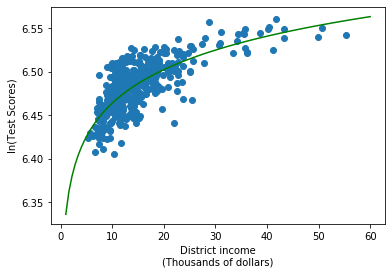

In [15]:
# This is for log-log function
x = np.array(data['avginc'])
y = np.array(data['testscr'])
xp = np.linspace(1,60,100)

plt.plot(x,np.log(y),'o')
plt.plot(xp, np.polyval(np.polyfit(np.log(x),np.log(y),1),log(xp)), 'g')
plt.xlabel('District income\n(Thousands of dollars)')
plt.ylabel('ln(Test Scores)')


Text(0, 0.5, 'ln(Test Scores)')

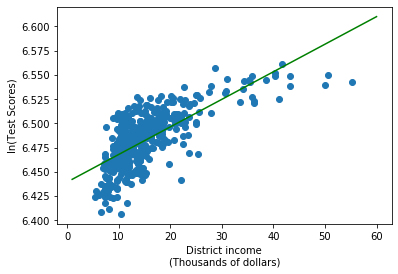

In [16]:
# This is for log-linear function
x = np.array(data['avginc'])
y = np.array(data['testscr'])
xp = np.linspace(1,60,100)

plt.plot(x,np.log(y),'o')
plt.plot(xp, np.polyval(np.polyfit(x,np.log(y),1),xp), 'g')
plt.xlabel('District income\n(Thousands of dollars)')
plt.ylabel('ln(Test Scores)')


In [17]:
reg = ols("testscr ~ np.log(avginc) + np.power(np.log(avginc),2) + np.power(np.log(avginc),3)", data = data).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     178.8
Date:                Fri, 14 Aug 2020   Prob (F-statistic):           1.90e-74
Time:                        10:00:22   Log-Likelihood:                -1659.4
No. Observations:                 420   AIC:                             3327.
Df Residuals:                     416   BIC:                             3343.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     486.1345     95.988      5.065      0.000     297.453     674.816
np.log(avginc)                113.3815    105.316      1.077      0.282     -93.636     320.399
np.power(np.log(avginc), 2)   -26.9109     37.882     -0.710      0.478    -101.375      47.553
np.power(np.log(avginc), 3)     3.0631      4.462      0.687      0.493      -5.707      11.834
==============================================================================
Omnibus:                        0.611   Durbin-Watson:                   0.998
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.467
Skew:                          -0.073   Prob(JB):                        0.792
Kurtosis:                       3.074   Cond. No.                     5.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Test Scores')

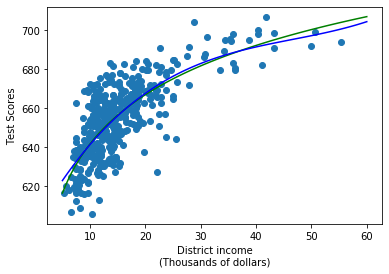

In [18]:
# This is for linear-log and cubic regression
# Green is linear-log regression
# Blue one is Cubic regression.
x = np.array(data['avginc'])
y = np.array(data['testscr'])
xp = np.linspace(5,60,100)

plt.plot(x,y,'o')
plt.plot(xp, np.polyval(np.polyfit(np.log(x),y,1),log(xp)), 'g')
plt.plot(xp, np.polyval(np.polyfit(x,y,3),xp), 'b')
plt.xlabel('District income\n(Thousands of dollars)')
plt.ylabel('Test Scores')


# 8.3 Interactions Between Independent Variables
### Y_i = B0 + B1*D1_i + B2*D2_i + u_i (8.27)
### Y_i B0 + B1*D1_i + B2*D2_i + B3*(D1_i*D2_i) + u_i (8.28)
D1_i*D2_i is called an interaction term or interacted regressor

In [19]:
data['HiSTR'] = data['str'] > 20
data['HiEL'] = data['el_pct'] > 10
converter = {False:0, True:1}
data.HiSTR = data.HiSTR.apply(lambda x: converter[x])
data.HiEL = data.HiEL.apply(lambda x: converter[x])
data

,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,...,expn_stu,str,avginc,el_pct,read_scr,math_scr,incomeSquared,incomeCube,HiSTR,HiEL
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,...,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000,514.836124,11681.631928,0,0
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,...,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024,96.510983,948.123932,1,0
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,...,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024,80.604478,723.666982,0,1
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,...,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000,80.604478,723.666982,0,0
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,...,5235.987793,18.671330,9.080333,13.857677,641.799988,639.900024,82.452443,748.695619,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,416,68957,San Mateo,Las Lomitas Elementary,KK-08,984,59.730000,0.101600,3.556900,195,...,7290.338867,16.474134,28.716999,5.995935,700.900024,707.700012,824.666034,23681.933728,0,0
416,417,69518,Santa Clara,Los Altos Elementary,KK-08,3724,208.479996,1.074100,1.503800,721,...,5741.462891,17.862625,41.734108,4.726101,704.000000,709.500000,1741.735768,72689.788599,0,0
417,418,72611,Ventura,Somis Union Elementary,KK-08,441,20.150000,3.563500,37.193802,45,...,4402.831543,21.885857,23.733000,24.263039,648.299988,641.700012,563.255280,13367.737436,1,1
418,419,72744,Yuba,Plumas Elementary,KK-08,101,5.000000,11.881200,59.405899,14,...,4776.336426,20.200001,9.952000,2.970297,667.900024,676.500000,99.042297,985.668910,1,0


In [20]:
reg = ols('testscr ~ C(HiSTR) + C(HiEL) + HiSTR:HiEL', data=data).fit(cov_type="HC1") 
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     61.33
Date:                Fri, 14 Aug 2020   Prob (F-statistic):           7.54e-33
Time:                        10:00:22   Log-Likelihood:                -1759.7
No. Observations:                 420   AIC:                             3527.
Df Residuals:                     416   BIC:                             3544.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       663.8516      1.376    482.457      0.000     661.155     666.549
C(HiSTR)[T.1]    -1.1082      1.924     -0.576      0.565      -4.878       2.662
C(HiEL)[T.1]    -17.8033      2.321     -7.671      0.000     -22.352     -13.255
HiSTR:HiEL       -4.5302      3.107     -1.458      0.145     -10.619       1.559
==============================================================================
Omnibus:                        8.188   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.453
Skew:                           0.341   Prob(JB):                       0.0146
Kurtosis:                       2.870   Cond. No.                         6.48
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [21]:
reg = ols('testscr ~ str + C(HiEL) + str:HiEL', data=data).fit(cov_type='HC1')
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     63.67
Date:                Fri, 14 Aug 2020   Prob (F-statistic):           6.74e-34
Time:                        10:00:22   Log-Likelihood:                -1755.3
No. Observations:                 420   AIC:                             3519.
Df Residuals:                     416   BIC:                             3535.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      682.2458     11.868     57.487      0.000     658.985     705.506
C(HiEL)[T.1]     5.6391     19.515      0.289      0.773     -32.609      43.887
str             -0.9685      0.589     -1.644      0.100      -2.123       0.186
str:HiEL        -1.2766      0.967     -1.320      0.187      -3.172       0.619
==============================================================================
Omnibus:                        4.924   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                5.019
Skew:                           0.252   Prob(JB):                       0.0813
Kurtosis:                       2.821   Cond. No.                         527.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [22]:
reg = ols('testscr ~ str + el_pct + str:el_pct', data=data).fit(cov_type='HC1')
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     155.0
Date:                Fri, 14 Aug 2020   Prob (F-statistic):           1.89e-67
Time:                        10:00:23   Log-Likelihood:                -1716.6
No. Observations:                 420   AIC:                             3441.
Df Residuals:                     416   BIC:                             3457.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    686.3385     11.759     58.365      0.000     663.291     709.386
str           -1.1170      0.588     -1.901      0.057      -2.269       0.034
el_pct        -0.6729      0.374     -1.799      0.072      -1.406       0.060
str:el_pct     0.0012      0.019      0.063      0.950      -0.035       0.037
==============================================================================
Omnibus:                        0.614   Durbin-Watson:                   0.686
Prob(Omnibus):                  0.736   Jarque-Bera (JB):                0.534
Skew:                           0.087   Prob(JB):                        0.766
Kurtosis:                       3.024   Cond. No.                     6.50e+03
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 6.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# This is basically to do regression charts like in the book. We import couple of libraries to do that.
reg1 = ols("testscr ~ str + el_pct + meal_pct", data=data).fit(cov_type='HC1')
reg2 = ols("testscr ~ str + el_pct + meal_pct + np.log(avginc)", data=data).fit(cov_type='HC1')
reg3 = ols("testscr ~ str + C(HiEL) + HiEL:str", data=data).fit(cov_type='HC1')
reg4 = ols("testscr ~ str + C(HiEL) + HiEL:str + meal_pct + np.log(avginc)", data=data).fit(cov_type='HC1')
reg5 = ols("testscr ~ str + np.power(str,2) + np.power(str,3) + C(HiEL) + meal_pct + np.log(avginc)", data=data).fit(cov_type='HC1')
reg6 = ols("testscr ~ str + np.power(str,2) + np.power(str,3) + HiEL + HiEL:str + HiEL:np.power(str,2) + HiEL:np.power(str,3) + meal_pct + np.log(avginc)", data=data).fit(cov_type='HC1')
reg7 = ols("testscr ~ str + np.power(str,2) + np.power(str,3) + el_pct + meal_pct + np.log(avginc)", data=data).fit(cov_type='HC1')
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
stargazer = Stargazer([reg1, reg2, reg3, reg4,reg5,reg6,reg7])
HTML(stargazer.render_html())


#### Note: The variables above table are a little bit out of order so be careful!

In [24]:
data


,Observation Number,dist_cod,county,district,gr_span,enrl_tot,teachers,calw_pct,meal_pct,computer,...,expn_stu,str,avginc,el_pct,read_scr,math_scr,incomeSquared,incomeCube,HiSTR,HiEL
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,...,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000,514.836124,11681.631928,0,0
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,...,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024,96.510983,948.123932,1,0
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,...,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024,80.604478,723.666982,0,1
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,...,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000,80.604478,723.666982,0,0
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,...,5235.987793,18.671330,9.080333,13.857677,641.799988,639.900024,82.452443,748.695619,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,416,68957,San Mateo,Las Lomitas Elementary,KK-08,984,59.730000,0.101600,3.556900,195,...,7290.338867,16.474134,28.716999,5.995935,700.900024,707.700012,824.666034,23681.933728,0,0
416,417,69518,Santa Clara,Los Altos Elementary,KK-08,3724,208.479996,1.074100,1.503800,721,...,5741.462891,17.862625,41.734108,4.726101,704.000000,709.500000,1741.735768,72689.788599,0,0
417,418,72611,Ventura,Somis Union Elementary,KK-08,441,20.150000,3.563500,37.193802,45,...,4402.831543,21.885857,23.733000,24.263039,648.299988,641.700012,563.255280,13367.737436,1,1
418,419,72744,Yuba,Plumas Elementary,KK-08,101,5.000000,11.881200,59.405899,14,...,4776.336426,20.200001,9.952000,2.970297,667.900024,676.500000,99.042297,985.668910,1,0


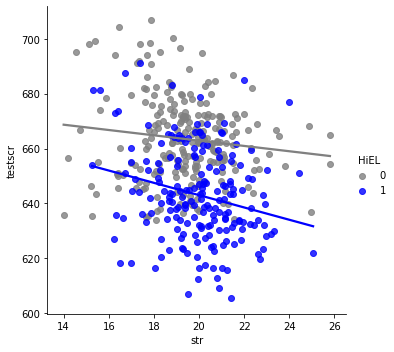

In [28]:
# In here I divided the data between two which are high english learners and low represented with blue and gray colours and their respective linear line based on their test scores.
sns.lmplot(x='str', y='testscr', hue = 'HiEL', data = data, ci=False, palette = {0:'gray',1:'blue'})


# Now let's go to the Practice questions

In [36]:
#1
#a
print('The percentage increase in sales actually is {:.4f}%'.format(100*(198-196)/196))
print('On the other hand the approximation is {:.4f}%'.format(100*(np.log(198)-np.log(196))))
#b
print('The percentage increase actually is {:.4f}%'.format(100*(205-196)/196))
print('On the other hand the approximation is {:.4f}%'.format(100*(np.log(205)-np.log(196))))
print('The percentage increase actually is {:.4f}%'.format(100*(250-196)/196))
print('On the other hand the approximation is {:.4f}%'.format(100*(np.log(250)-np.log(196))))
print('The percentage increase actually is {:.4f}%'.format(100*(500-196)/196))
print('On the other hand the approximation is {:.4f}%'.format(100*(np.log(500)-np.log(196))))
#c
print('The approximation is fairly accurate when the change is small but when the change is big, it is extremely off')

The percentage increase in sales actually is 1.0204%
On the other hand the approximation is 1.0152%
The percentage increase actually is 4.5918%
On the other hand the approximation is 4.4895%
The percentage increase actually is 27.5510%
On the other hand the approximation is 24.3346%
The percentage increase actually is 155.1020%
On the other hand the approximation is 93.6493%
The approximation is fairly accurate when the change is small but when the change is big, it is extremely off


In [55]:
#2
import scipy.stats as st
#a
print('The expected change in price of a building a 500-square-foot addition to a house {:.4f}%'.format(100*0.00042*500))
print('The 95% CI is ({0:.4f}%, {1:.4f}%)'.format(100*500*(0.00042-st.norm.ppf(1-(0.05/2))*0.000038), 100*500*(0.00042+st.norm.ppf(1-(0.05/2))*0.000038)))
#b is skipped
#c
print('The house price is expected to increase by {:.4f}%'.format(100*0.071*1))
print('The 95% CI is ({0:.4f}%, {1:.4f}%)'.format(100*(0.071-st.norm.ppf(1-(0.05/2))*0.034), 100*(0.071+st.norm.ppf(1-(0.05/2))*0.034)))
#d
print('The house price is expected to increase by {:.4f}%'.format(100*0.0036*1))
t = 0.0036/0.037
critical_value = st.norm.ppf(1-(0.05/2))
def Significant(t,critical_value):    
    if t < critical_value:
        print('Not statistically significant due to t={0:.4f}<{1:.4f}'.format(t,critical_value))
    else:
        print('It is statistically significant due to t={0:.4f}>{1:.4f}'.format(t,critical_value))
Significant(t=t,critical_value=critical_value)
#e
t = 0.0078/0.14
Significant(t=t,critical_value=critical_value)
#f
print('The difference in the expected percentage change in price is {:.4f}%'.format(0.22))
t = 0.0022/0.10
Significant(t=t,critical_value=critical_value)

The expected change in price of a building a 500-square-foot addition to a house 21.0000%
The 95% CI is (17.2761%, 24.7239%)
The house price is expected to increase by 7.1000%
The 95% CI is (0.4361%, 13.7639%)
The house price is expected to increase by 0.3600%
Not statistically significant due to t=0.0973<1.9600
Not statistically significant due to t=0.0557<1.9600
The difference in the expected percentage change in price is 0.2200%
Not statistically significant due to t=0.0220<1.9600


In [60]:
#3 is skipped
#4
#a
With_2_year_exp = (0.1114*16)-(0.368*0)+(0.0082*0*16)+(0.0147*2)-0.000183*2**2
With_3_year_exp = (0.1114*16)-(0.368*0)+(0.0082*0*16)+(0.0147*3)-0.000183*3**2
print(With_3_year_exp-With_2_year_exp)
#b is skipped
#c
With_10_year_exp = (0.1114*16)-(0.368*0)+(0.0082*0*16)+(0.0147*10)-0.000183*10**2
With_11_year_exp = (0.1114*16)-(0.368*0)+(0.0082*0*16)+(0.0147*11)-0.000183*11**2
print(With_11_year_exp-With_10_year_exp)

0.013784999999999936
0.010856999999999895


In [61]:
#5
#b
print('The effect of ln(Price Per citation) is given by {:.4f}'.format(-0.899+0.141*np.log(80)))

The effect of ln(Price Per citation) is given by -0.2811
